## 인스타그램

### 라이브러리 설치

In [3]:
!apt-get update
!apt-get install chromium-chromedriver
!pip install selenium webdriver_manager
!pip install selenium
!pip install beautifulsoup4
!pip install requests
!pip install pandas

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get


In [27]:
# !pip uninstall selenium 
# !pip uninstall selenium
# !pip install selenium==2.48.0

  Using cached selenium-2.48.0-py3-none-any.whl


In [1]:
import time
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import requests
from bs4 import BeautifulSoup

import csv 
import pandas as pd 
import re

### 웹 드라이브 사용하기

In [3]:
browser = webdriver.Chrome('./chromedriver')

In [4]:
browser.get('https://www.instagram.com/')

In [5]:
search = browser.find_element(By.XPATH,'//*[@id="loginForm"]/div/div[1]/div/label/input')
search.click()
time.sleep(2) # 로딩 시간을 위한 대기 

In [6]:
search.send_keys('아이디') #수집자의 인스타 그램 아이디를 '아이디' 글자를 지우고 입력하세요
search.send_keys(Keys.ENTER) # 검색 후 클릭
time.sleep(2) # 로딩 시간을 위한 대기 

In [7]:
search = browser.find_element(By.XPATH,'//*[@id="loginForm"]/div/div[2]/div/label/input')
search.click()
time.sleep(2) # 로딩 시간을 위한 대기 

In [8]:
search.send_keys('비번') #수집자의 인스타 그램 비밀번호를 '비번' 글자를 지우고 입력하세요
search.send_keys(Keys.ENTER) # 검색 후 클릭
time.sleep(2) # 로딩 시간을 위한 대기 

In [10]:
# 로그인정보 저장 나왔을때 실행 - 저장하지 않기
search = browser.find_element(By.XPATH,'//*[@id="mount_0_0_vu"]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/section/main/div/div/div/div/div')
search.click()

In [11]:
# 알람설정 나왔을때 실행 - 나중에하기 클릭
search = browser.find_element(By.XPATH,'/html/body/div[4]/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]')
search.click()

In [12]:
#친환경패션에 대한 태그 검색
browser.get('https://www.instagram.com/explore/tags/친환경패션')
time.sleep(2) # 로딩 시간을 위한 대기 

In [13]:
#페이지 내리기
# 페이지 아래 부분으로 이동 - 더 많은 게시글을 확인하기 위해서
# 스크롤 전 높이
before_h = browser.execute_script("return window.scrollY") # 현재 스크롤 된 높이를 계산
maxInt = 10
# 무한 반복문 사용
loopNum = 0
while True:
    # 맨 아래로 스크롤을 내린다.
    browser.find_element(By.CSS_SELECTOR, "body").send_keys(Keys.END) # end키를 통해 스크롤을 맨 아래로 내림 

    # 스크롤 사이 페이지 로딩 시간 추가
    time.sleep(2)

    # 스크롤 후 높이 확인 
    after_h = browser.execute_script("return window.scrollY")

    # before_h = after_h # after의 높이를 before로 갱신

    if after_h > 10000 or loopNum > maxInt: # 스크롤 높이보다 높으면 멈춤 - 해당 사이즈를 늘리면 더 많은 데이터를 가져올 수 있다.
        #스크롤 내리는 횟수가 maxInt보다 많아지면 멈추기
        break
    loopNum += 1

<html class="_9dls js-focus-visible _aa4d" data-js-focus-visible="" dir="ltr" lang="ko"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192"><meta content="noarchive" name="bingbot"><meta content="noarchive, noimageindex" name="robots"><meta charset="utf-8"><meta content="default" name="apple-mobile-web-app-status-bar-style"><meta content="yes" name="mobile-web-app-capable"><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"><link href="https://scontent-ssn1-1.cdninstagram.com" rel="preconnect"><link href="https://scontent-ssn1-1.cdninstagram.com" rel="dns-prefetch"><meta content="#242526" name="theme-color"><meta content="#000000" media="(prefers-color-scheme: dark)" name="theme-color"><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png"
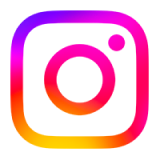
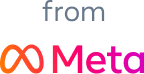

In [14]:
# 페이지 소스 출력
html = browser.page_source
html_source = BeautifulSoup(html, 'html.parser')
print(html_source)

In [15]:
# postHTML = html_source.find_all("a", class_ = "x1i10hfl.xjbqb8w.x6umtig.x1b1mbwd.xaqea5y.xav7gou.x9f619.x1ypdohk.xt0psk2.xe8uvvx.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x16tdsg8.x1hl2dhg.xggy1nq.x1a2a7pz._a6hd")
postHTML = html_source.find_all("a")
postLinks = []
for eachPost in postHTML:
    eachString = str(eachPost.attrs['href'])
    if "/p/" in eachString:
        eachLink = "https://www.instagram.com" + eachString
        postLinks.append(eachLink)
    print(eachPost.attrs['href'])

/
/explore/
/reels/
#
/direct/inbox/
/simon.seongmin.mun/
/p/C65HkCupTsS/
/p/C66BGfCyrCW/
/p/C67vcHLLaXX/
/p/CUrm3vFJlqc/
/p/C29TY5dpGfy/
/p/CvI8J42PH0H/
/p/CoCEHTZp6rE/
/p/C6pp7pryLbJ/
/p/C6dEnexS054/
/p/Cq-jNffvrqP/
/p/C65ZeAnPnjh/
/p/C6xF7u8PUA2/
/p/C65IH4KJVhV/
/p/C62ync2gJM2/
/p/C6vbEqZvI3b/
/p/C6vbKE6vJm8/
/p/C6m1KKShwLP/
/p/C6axneBpKwF/
/p/C6yAc2ryCF2/
/p/C63aZ-zRwHy/
/p/C6vtfvwLQGm/
/p/C6ZEZoTSyQC/
/p/C6x-7nHOWBk/
/p/Cs5HQQFp1sW/
/p/CdN6zCQJvEi/
/p/C66JESELhvR/
/p/CSIczq7nQln/
/p/CqCIWu0vyRb/
/


In [16]:
print(postLinks)

['https://www.instagram.com/p/C65HkCupTsS/', 'https://www.instagram.com/p/C66BGfCyrCW/', 'https://www.instagram.com/p/C67vcHLLaXX/', 'https://www.instagram.com/p/CUrm3vFJlqc/', 'https://www.instagram.com/p/C29TY5dpGfy/', 'https://www.instagram.com/p/CvI8J42PH0H/', 'https://www.instagram.com/p/CoCEHTZp6rE/', 'https://www.instagram.com/p/C6pp7pryLbJ/', 'https://www.instagram.com/p/C6dEnexS054/', 'https://www.instagram.com/p/Cq-jNffvrqP/', 'https://www.instagram.com/p/C65ZeAnPnjh/', 'https://www.instagram.com/p/C6xF7u8PUA2/', 'https://www.instagram.com/p/C65IH4KJVhV/', 'https://www.instagram.com/p/C62ync2gJM2/', 'https://www.instagram.com/p/C6vbEqZvI3b/', 'https://www.instagram.com/p/C6vbKE6vJm8/', 'https://www.instagram.com/p/C6m1KKShwLP/', 'https://www.instagram.com/p/C6axneBpKwF/', 'https://www.instagram.com/p/C6yAc2ryCF2/', 'https://www.instagram.com/p/C63aZ-zRwHy/', 'https://www.instagram.com/p/C6vtfvwLQGm/', 'https://www.instagram.com/p/C6ZEZoTSyQC/', 'https://www.instagram.com/p/C6

In [17]:
browser.get(postLinks[0])

<html class="_9dls js-focus-visible _aa4d" data-js-focus-visible="" dir="ltr" lang="ko"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192"><meta content="noarchive" name="bingbot"><meta content="noarchive, noimageindex" name="robots"><meta charset="utf-8"><meta content="default" name="apple-mobile-web-app-status-bar-style"><meta content="yes" name="mobile-web-app-capable"><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"><link href="https://scontent-ssn1-1.cdninstagram.com" rel="preconnect"><link href="https://scontent-ssn1-1.cdninstagram.com" rel="dns-prefetch"><meta content="#242526" name="theme-color"><meta content="#000000" media="(prefers-color-scheme: dark)" name="theme-color"><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png"
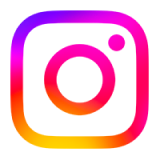
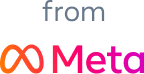

In [18]:
# 페이지 소스 출력
html = browser.page_source
html_source = BeautifulSoup(html, 'html.parser')
print(html_source)

In [19]:
textReview = html_source.find_all("h1", class_ = "_ap3a _aaco _aacu _aacx _aad7 _aade")
for eachReview in textReview:
    print(eachReview.get_text())

뭐? 내가 @positiveme.official 10기 앰버서더라고?!!


In [20]:
#for 문을 활용해서 자동화하기
postingText = []
for eachLink in postLinks:
    browser.get(eachLink)
    time.sleep(4) # 로딩 시간을 위한 대기 
    # 페이지 소스 출력
    html = browser.page_source
    html_source = BeautifulSoup(html, 'html.parser')
    textReview = html_source.find_all("h1", class_ = "_ap3a _aaco _aacu _aacx _aad7 _aade")
    for eachReview in textReview:
        print(eachReview.get_text())
        postingText.append(eachReview.get_text())

뭐? 내가 @positiveme.official 10기 앰버서더라고?!!
여러분! 저 포미걸💙 됐어요!!
[Brand Archive] Long Label은 우리에게 익숙한 패션 브랜드들의 친환경적인 노력을 소비자의 시선에서 분석하고 해석해 봅니다.
사과껍질로 가방을 만드는 세상이 오다니
이제는 소비자도 원하는 지속 가능한 패션
#광고 x @timberlandkorea
2월에 알아두면 좋을 것들ㅣ𝗖𝗤𝗥 𝗖𝗔𝗟𝗘𝗡𝗗𝗔𝗥지금 알아두면 좋
비건가죽! 친환경 브랜드 @hlk.official @harlie_k 
오늘도 햇살 가든한 날이네요🌞
#광고 @timberlandkorea ⛰️🥾
VIER-J1(피어) 
⠀
나를 긍정하는 방법이 있나요?💙
Sustainable Activewear
⠀
⠀
저 어때요?? 오늘도 멋진 한 주를 시작해야죠?? 전 오늘 전 항상 시작과 끝을 중요시해요~ 과정은 당연히 최선을 다하기에~ 결국 3박자 모두를 최선을 다 하는거네요~ 항상 최선을 다해서 멋진 결과를 얻을 수 있게
이거 꽤 오래걸렸다
🌸
요즘 내 스타일 ✨🌏
[Report] 환경을 위해, 새로운 제작 방식으로의 전환을 위해 패션 산업 전체는 어떤 방향으로 움직이고 있을까요? 
스타일과 지구를 동시에 생각하는 당신에게🌿 스마일 에코백으로 매일을 더 밝고 즐겁게! 나만의 패션 센스를 뽐내보세요!😊
많이 기다리셨죠! 기존 시티의 리뉴얼 버전, New 시티를 오늘부터 만나볼 수 있습니다.
환경과 패션을 동시에 사랑할수는 없을까?
분위기 압도🎭🏠종이의 집 강도단⁣장
#협찬 ⠀
#광고


In [23]:
print(postingText)

['뭐? 내가 @positiveme.official 10기 앰버서더라고?!!', '여러분! 저 포미걸💙 됐어요!!', '[Brand Archive] Long Label은 우리에게 익숙한 패션 브랜드들의 친환경적인 노력을 소비자의 시선에서 분석하고 해석해 봅니다.', '사과껍질로 가방을 만드는 세상이 오다니', '이제는 소비자도 원하는 지속 가능한 패션', '#광고 x @timberlandkorea', '2월에 알아두면 좋을 것들ㅣ𝗖𝗤𝗥 𝗖𝗔𝗟𝗘𝗡𝗗𝗔𝗥지금 알아두면 좋', '비건가죽! 친환경 브랜드 @hlk.official @harlie_k ', '오늘도 햇살 가든한 날이네요🌞', '#광고 @timberlandkorea ⛰️🥾', 'VIER-J1(피어) ', '⠀', '나를 긍정하는 방법이 있나요?💙', 'Sustainable Activewear', '⠀', '⠀', '저 어때요?? 오늘도 멋진 한 주를 시작해야죠?? 전 오늘 전 항상 시작과 끝을 중요시해요~ 과정은 당연히 최선을 다하기에~ 결국 3박자 모두를 최선을 다 하는거네요~ 항상 최선을 다해서 멋진 결과를 얻을 수 있게', '이거 꽤 오래걸렸다', '🌸', '요즘 내 스타일 ✨🌏', '[Report] 환경을 위해, 새로운 제작 방식으로의 전환을 위해 패션 산업 전체는 어떤 방향으로 움직이고 있을까요? ', '스타일과 지구를 동시에 생각하는 당신에게🌿 스마일 에코백으로 매일을 더 밝고 즐겁게! 나만의 패션 센스를 뽐내보세요!😊', '많이 기다리셨죠! 기존 시티의 리뉴얼 버전, New 시티를 오늘부터 만나볼 수 있습니다.', '환경과 패션을 동시에 사랑할수는 없을까?', '분위기 압도🎭🏠종이의 집 강도단\u2063장', '#협찬 ⠀', '#광고']


In [25]:
#가져온 정보 확인 가져오기
print(len(postLinks))
print(len(postingText))

28
28


In [24]:
postingText.append(" ") 

In [26]:
instagramDF = pd.DataFrame({'link':postLinks, 'text': postingText})
instagramDF.to_csv('./Data/instagramDF.csv')